# K-Means Clustering From Scratch (Full Assignment)
This notebook implements K-Means from first principles and compares with sklearn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


## Generate Synthetic Dataset

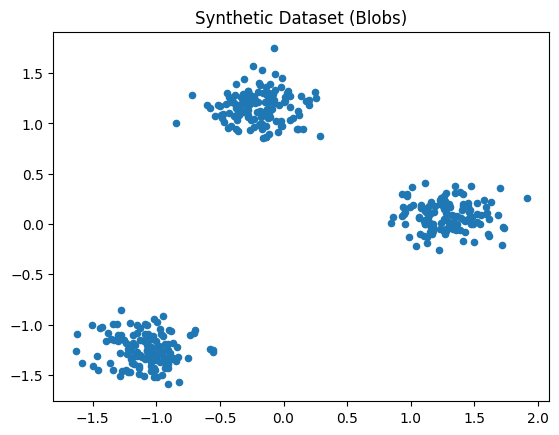

In [2]:
X, y_true = make_blobs(n_samples=400, centers=3, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.scatter(X[:,0], X[:,1], s=20)
plt.title("Synthetic Dataset (Blobs)")
plt.show()


## K-Means Implementation

In [3]:
def euclidean(a,b): return np.linalg.norm(a-b)
def manhattan(a,b): return np.sum(np.abs(a-b))

class KMeansScratch:
    def __init__(self, k=3, max_iters=100, init="random", distance="euclidean"):
        self.k=k; self.max_iters=max_iters
        self.init=init; self.distance=distance

    def _dist(self,a,b):
        return euclidean(a,b) if self.distance=="euclidean" else manhattan(a,b)

    def initialize_centroids(self,X):
        if self.init=="random":
            idx=np.random.choice(len(X), self.k, replace=False)
            return X[idx]
        elif self.init=="kmeans++":
            centroids=[]
            centroids.append(X[np.random.randint(len(X))])
            for _ in range(1,self.k):
                dists=np.array([min([self._dist(x,c)**2 for c in centroids]) for x in X])
                probs=dists/dists.sum()
                centroids.append(X[np.random.choice(len(X),p=probs)])
            return np.array(centroids)

    def fit(self,X):
        self.centroids=self.initialize_centroids(X)
        for _ in range(self.max_iters):
            labels=np.array([np.argmin([self._dist(x,c) for c in self.centroids]) for x in X])
            new_centroids=np.array([X[labels==i].mean(axis=0) for i in range(self.k)])
            if np.allclose(self.centroids,new_centroids):
                break
            self.centroids=new_centroids
        self.labels_=labels
        return self


## Run K-Means (Scratch)

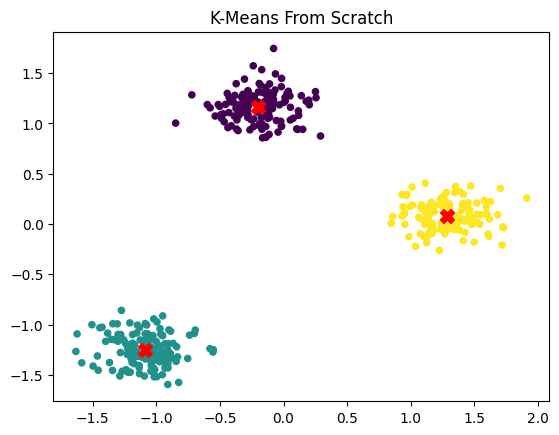

0.845857065650404

In [4]:
kmeans = KMeansScratch(k=3, init="kmeans++", distance="euclidean")
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,s=20,cmap='viridis')
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],c='red',s=100,marker='X')
plt.title("K-Means From Scratch")
plt.show()

silhouette_score(X, kmeans.labels_)


## Real World Dataset (Iris)

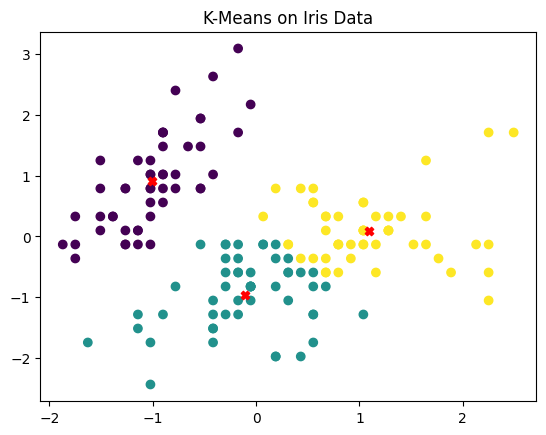

In [5]:
iris = load_iris()
X_iris = iris.data[:, :2]
X_iris = StandardScaler().fit_transform(X_iris)

kmeans2 = KMeansScratch(k=3, init="kmeans++")
kmeans2.fit(X_iris)

plt.scatter(X_iris[:,0],X_iris[:,1],c=kmeans2.labels_,cmap='viridis')
plt.scatter(kmeans2.centroids[:,0],kmeans2.centroids[:,1],c='red',marker='X')
plt.title("K-Means on Iris Data")
plt.show()